## Dolphin social network

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import community as community_louvain
import seaborn as sns
import random
import plotly.graph_objs as go

### Importazione file

In [2]:
# Leggere il file GML
G = nx.read_gml('dolphins/dolphins.gml')

In [3]:
G.nodes

NodeView(('Beak', 'Beescratch', 'Bumper', 'CCL', 'Cross', 'DN16', 'DN21', 'DN63', 'Double', 'Feather', 'Fish', 'Five', 'Fork', 'Gallatin', 'Grin', 'Haecksel', 'Hook', 'Jet', 'Jonah', 'Knit', 'Kringel', 'MN105', 'MN23', 'MN60', 'MN83', 'Mus', 'Notch', 'Number1', 'Oscar', 'Patchback', 'PL', 'Quasi', 'Ripplefluke', 'Scabs', 'Shmuddel', 'SMN5', 'SN100', 'SN4', 'SN63', 'SN89', 'SN9', 'SN90', 'SN96', 'Stripes', 'Thumper', 'Topless', 'TR120', 'TR77', 'TR82', 'TR88', 'TR99', 'Trigger', 'TSN103', 'TSN83', 'Upbang', 'Vau', 'Wave', 'Web', 'Whitetip', 'Zap', 'Zig', 'Zipfel'))

In [4]:
G.edges

EdgeView([('Beak', 'Fish'), ('Beak', 'Grin'), ('Beak', 'Haecksel'), ('Beak', 'SN9'), ('Beak', 'SN96'), ('Beak', 'TR77'), ('Beescratch', 'Jet'), ('Beescratch', 'Knit'), ('Beescratch', 'Notch'), ('Beescratch', 'Number1'), ('Beescratch', 'Oscar'), ('Beescratch', 'SN100'), ('Beescratch', 'SN90'), ('Beescratch', 'Upbang'), ('Bumper', 'Fish'), ('Bumper', 'SN96'), ('Bumper', 'Thumper'), ('Bumper', 'Zipfel'), ('CCL', 'Double'), ('CCL', 'Grin'), ('CCL', 'Zap'), ('Cross', 'Trigger'), ('DN16', 'Feather'), ('DN16', 'Gallatin'), ('DN16', 'Wave'), ('DN16', 'Web'), ('DN21', 'Feather'), ('DN21', 'Gallatin'), ('DN21', 'Jet'), ('DN21', 'Upbang'), ('DN21', 'Wave'), ('DN21', 'Web'), ('DN63', 'Knit'), ('DN63', 'Number1'), ('DN63', 'PL'), ('DN63', 'SN9'), ('DN63', 'Upbang'), ('Double', 'Kringel'), ('Double', 'Oscar'), ('Double', 'SN4'), ('Double', 'Topless'), ('Double', 'Zap'), ('Feather', 'Gallatin'), ('Feather', 'Jet'), ('Feather', 'Ripplefluke'), ('Feather', 'SN90'), ('Feather', 'Web'), ('Fish', 'Patchba

In [5]:
G.is_directed()  #Il grafo è indiretto; tutti gli spigoli sono reciproci.

False

In [6]:
print("Numero di nodi: ", G.number_of_nodes())
print("Numero di archi: ", G.number_of_edges())

Numero di nodi:  62
Numero di archi:  159


### Grafo dei delfini di Doubtful Sound

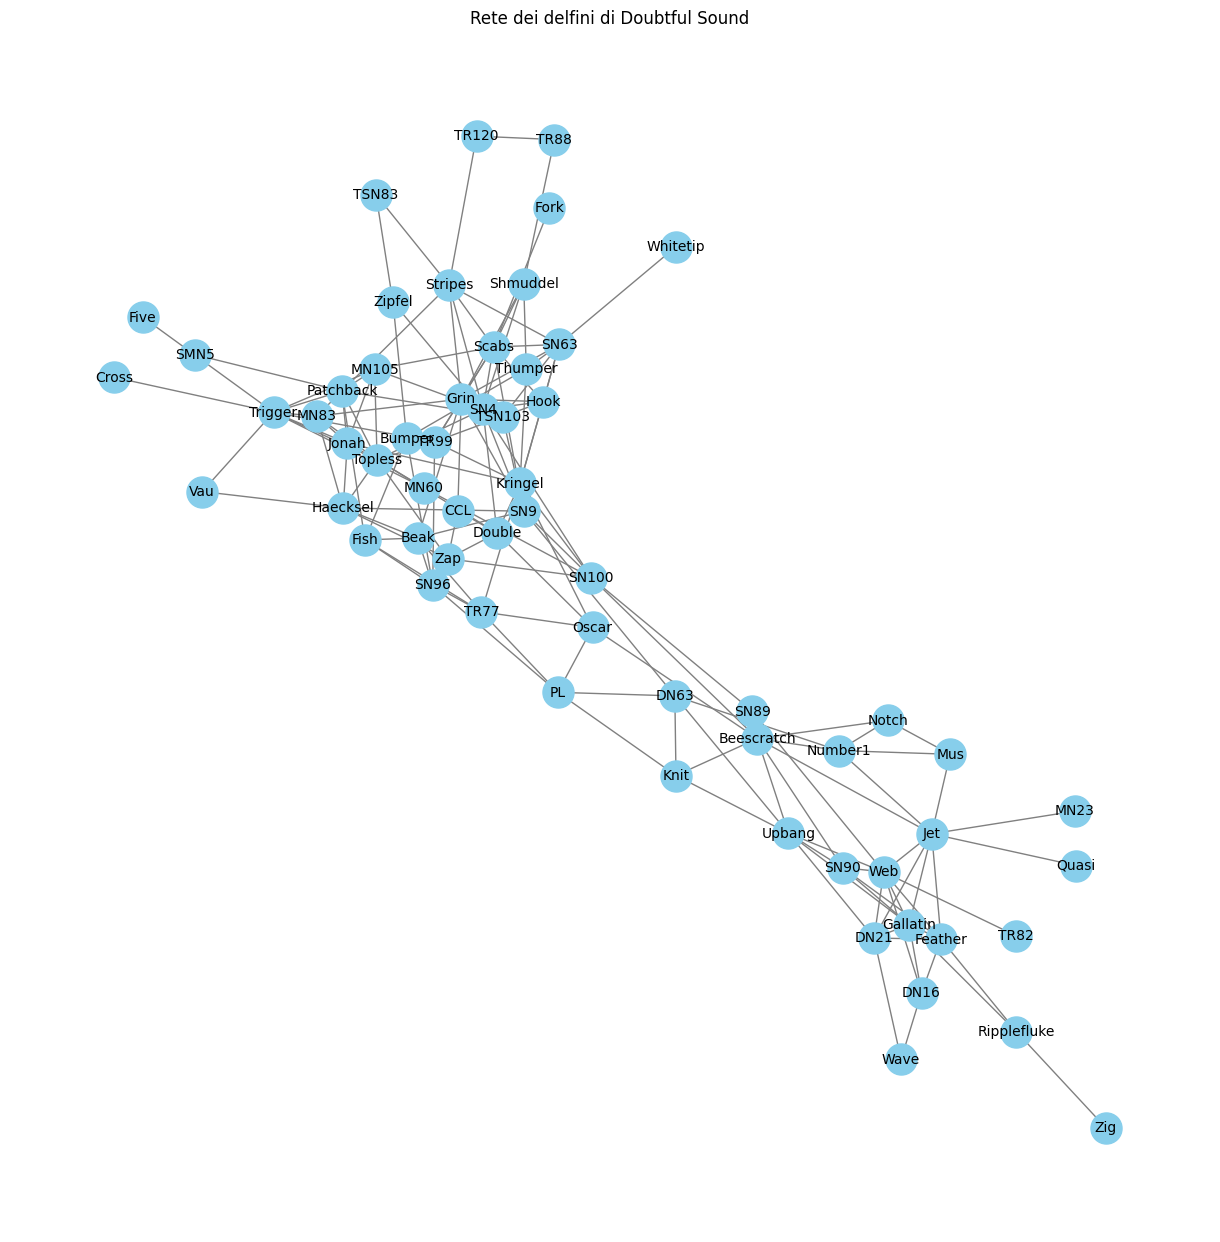

In [7]:
# Disegnare il grafo
plt.figure(figsize=(12, 12))
nx.draw(G, with_labels=True, node_size=500, node_color="skyblue", edge_color="gray", font_size=10, font_color="black")
plt.title("Rete dei delfini di Doubtful Sound")
plt.show()


### Grado dei nodi

In [8]:
# Calcolare il grado di ciascun nodo (numero di connessioni per ogni delfino)
degree_dict = dict(G.degree())
#print(degree_dict)

# Creare una lista di tuple (nodo, grado) e ordinare in base al grado decrescente
sorted_degrees = sorted(degree_dict.items(), key=lambda x: x[1], reverse=True)

# Stampare i nodi ordinati per grado
print("Nodi ordinati per grado (dal più alto al più basso):")
for node, degree in sorted_degrees:
    print(f"Nodo: {node}, Grado: {degree}")

Nodi ordinati per grado (dal più alto al più basso):
Nodo: Grin, Grado: 12
Nodo: SN4, Grado: 11
Nodo: Topless, Grado: 11
Nodo: Scabs, Grado: 10
Nodo: Trigger, Grado: 10
Nodo: Jet, Grado: 9
Nodo: Kringel, Grado: 9
Nodo: Patchback, Grado: 9
Nodo: Web, Grado: 9
Nodo: Beescratch, Grado: 8
Nodo: Gallatin, Grado: 8
Nodo: SN63, Grado: 8
Nodo: SN9, Grado: 8
Nodo: Feather, Grado: 7
Nodo: Haecksel, Grado: 7
Nodo: Jonah, Grado: 7
Nodo: SN100, Grado: 7
Nodo: Stripes, Grado: 7
Nodo: TR99, Grado: 7
Nodo: Upbang, Grado: 7
Nodo: Beak, Grado: 6
Nodo: DN21, Grado: 6
Nodo: Double, Grado: 6
Nodo: Hook, Grado: 6
Nodo: MN105, Grado: 6
Nodo: MN83, Grado: 6
Nodo: SN96, Grado: 6
Nodo: TR77, Grado: 6
Nodo: DN63, Grado: 5
Nodo: Fish, Grado: 5
Nodo: Number1, Grado: 5
Nodo: Oscar, Grado: 5
Nodo: PL, Grado: 5
Nodo: Shmuddel, Grado: 5
Nodo: SN90, Grado: 5
Nodo: Zap, Grado: 5
Nodo: Bumper, Grado: 4
Nodo: DN16, Grado: 4
Nodo: Knit, Grado: 4
Nodo: Thumper, Grado: 4
Nodo: TSN103, Grado: 4
Nodo: CCL, Grado: 3
Nodo: MN60,

### Centralità dei nodi

In [9]:
# Calcolare la centralità di grado per calcolare l'importanza di ciascun nodo
degree_centrality = nx.degree_centrality(G)

# Ordinare i nodi per centralità di grado (dal più alto al più basso)
sorted_degree_centrality = {k: v for k, v in sorted(degree_centrality.items(), key=lambda item: item[1], reverse=True)}

print("Nodi ordinati per centralità di grado:")
for node, centrality in sorted_degree_centrality.items():
    print(f"Nodo {node}: {centrality:.4f}")

Nodi ordinati per centralità di grado:
Nodo Grin: 0.1967
Nodo SN4: 0.1803
Nodo Topless: 0.1803
Nodo Scabs: 0.1639
Nodo Trigger: 0.1639
Nodo Jet: 0.1475
Nodo Kringel: 0.1475
Nodo Patchback: 0.1475
Nodo Web: 0.1475
Nodo Beescratch: 0.1311
Nodo Gallatin: 0.1311
Nodo SN63: 0.1311
Nodo SN9: 0.1311
Nodo Feather: 0.1148
Nodo Haecksel: 0.1148
Nodo Jonah: 0.1148
Nodo SN100: 0.1148
Nodo Stripes: 0.1148
Nodo TR99: 0.1148
Nodo Upbang: 0.1148
Nodo Beak: 0.0984
Nodo DN21: 0.0984
Nodo Double: 0.0984
Nodo Hook: 0.0984
Nodo MN105: 0.0984
Nodo MN83: 0.0984
Nodo SN96: 0.0984
Nodo TR77: 0.0984
Nodo DN63: 0.0820
Nodo Fish: 0.0820
Nodo Number1: 0.0820
Nodo Oscar: 0.0820
Nodo PL: 0.0820
Nodo Shmuddel: 0.0820
Nodo SN90: 0.0820
Nodo Zap: 0.0820
Nodo Bumper: 0.0656
Nodo DN16: 0.0656
Nodo Knit: 0.0656
Nodo Thumper: 0.0656
Nodo TSN103: 0.0656
Nodo CCL: 0.0492
Nodo MN60: 0.0492
Nodo Mus: 0.0492
Nodo Notch: 0.0492
Nodo Ripplefluke: 0.0492
Nodo Zipfel: 0.0492
Nodo SN89: 0.0328
Nodo TR120: 0.0328
Nodo TR88: 0.0328
No

In [10]:
# Calcolare la centralità di betweenness per calcolare l'importanza di ciascun nodo
betweenness_centrality = nx.betweenness_centrality(G)

# Ordinare i nodi per centralità di betweenness (dal più alto al più basso)
sorted_betweenness_centrality = {k: v for k, v in sorted(betweenness_centrality.items(), key=lambda item: item[1], reverse=True)}

print("Nodi ordinati per centralità di betweenness:")
for node, centrality in sorted_betweenness_centrality.items():
    print(f"Nodo {node}: {centrality:.4f}")

Nodi ordinati per centralità di betweenness:
Nodo SN100: 0.2482
Nodo Beescratch: 0.2133
Nodo SN9: 0.1431
Nodo SN4: 0.1386
Nodo DN63: 0.1182
Nodo Jet: 0.1143
Nodo Kringel: 0.1026
Nodo Upbang: 0.0991
Nodo Trigger: 0.0847
Nodo Web: 0.0842
Nodo SN89: 0.0705
Nodo Oscar: 0.0668
Nodo Patchback: 0.0655
Nodo Stripes: 0.0628
Nodo Grin: 0.0620
Nodo Scabs: 0.0572
Nodo Gallatin: 0.0528
Nodo SN63: 0.0454
Nodo MN60: 0.0422
Nodo Topless: 0.0407
Nodo TR99: 0.0334
Nodo Haecksel: 0.0333
Nodo PL: 0.0331
Nodo Ripplefluke: 0.0328
Nodo Shmuddel: 0.0327
Nodo DN21: 0.0294
Nodo Number1: 0.0292
Nodo SN96: 0.0292
Nodo SN90: 0.0233
Nodo TR77: 0.0232
Nodo Double: 0.0224
Nodo Feather: 0.0209
Nodo Zap: 0.0203
Nodo TSN103: 0.0192
Nodo Beak: 0.0191
Nodo Fish: 0.0161
Nodo Jonah: 0.0149
Nodo Zipfel: 0.0142
Nodo Knit: 0.0133
Nodo MN105: 0.0127
Nodo Thumper: 0.0120
Nodo Bumper: 0.0091
Nodo MN83: 0.0074
Nodo DN16: 0.0044
Nodo Notch: 0.0044
Nodo Hook: 0.0033
Nodo TR120: 0.0030
Nodo CCL: 0.0024
Nodo Mus: 0.0016
Nodo TSN83: 0.

### Coefficiente di clustering

In [11]:
# Calcolare il coefficiente di clustering (per individuare le comunità di delfini)
clustering_coefficient = nx.average_clustering(G)
print(f"Coefficiente di clustering: {clustering_coefficient:.4f}")

Coefficiente di clustering: 0.2590


### Identificazione delle comunità

In [12]:
# Trovare le comunità usando l'algoritmo Louvain
partition = community_louvain.best_partition(G)
print("Numero di comunità trovate:", len(set(partition.values())))

# Disegnare la rete con colori diversi per ciascuna comunità
plt.figure(figsize=(12, 12))
cmap = plt.cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_nodes(G, pos, node_color=list(partition.values()), cmap=cmap, node_size=500)
nx.draw_networkx_edges(G, pos, edge_color='gray')
nx.draw_networkx_labels(G, pos, font_size=10, font_color='black')
plt.title('Rete dei delfini di Doubtful Sound - Comunità identificate')
plt.show()


AttributeError: module 'community' has no attribute 'best_partition'

## PROVEEEE

In [ ]:
# Degree Distribution
degrees = [deg for node, deg in G.degree()]
plt.figure(figsize=(8, 6))
plt.hist(degrees, bins=20, alpha=0.7, color='skyblue')
plt.title('Degree Distribution of Dolphin Social Network')
plt.xlabel('Degree')
plt.ylabel('Number of Nodes')
plt.grid(True)
plt.show()

# Basic Network Properties
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()
average_degree = sum(degrees) / num_nodes
density = nx.density(G)
print(f"Number of nodes: {num_nodes}")
print(f"Number of edges: {num_edges}")
print(f"Average degree: {average_degree:.2f}")
print(f"Density: {density:.4f}")


In [ ]:
# Grado di ogni nodo
degree_dict = dict(G.degree(G.nodes()))
nx.set_node_attributes(G, degree_dict, 'degree')

# Centralità di betweenness
betweenness_dict = nx.betweenness_centrality(G)
nx.set_node_attributes(G, betweenness_dict, 'betweenness')

# Centralità di closeness
closeness_dict = nx.closeness_centrality(G)
nx.set_node_attributes(G, closeness_dict, 'closeness')

# Centralità di eigenvector
eigenvector_dict = nx.eigenvector_centrality(G)
nx.set_node_attributes(G, eigenvector_dict, 'eigenvector')

# Visualizzare alcune metriche
print("Grado di ogni nodo:", degree_dict)
print("Centralità di betweenness:", betweenness_dict)
print("Centralità di closeness:", closeness_dict)
print("Centralità di eigenvector:", eigenvector_dict)


Grado di ogni nodo: {'Beak': 6, 'Beescratch': 8, 'Bumper': 4, 'CCL': 3, 'Cross': 1, 'DN16': 4, 'DN21': 6, 'DN63': 5, 'Double': 6, 'Feather': 7, 'Fish': 5, 'Five': 1, 'Fork': 1, 'Gallatin': 8, 'Grin': 12, 'Haecksel': 7, 'Hook': 6, 'Jet': 9, 'Jonah': 7, 'Knit': 4, 'Kringel': 9, 'MN105': 6, 'MN23': 1, 'MN60': 3, 'MN83': 6, 'Mus': 3, 'Notch': 3, 'Number1': 5, 'Oscar': 5, 'Patchback': 9, 'PL': 5, 'Quasi': 1, 'Ripplefluke': 3, 'Scabs': 10, 'Shmuddel': 5, 'SMN5': 1, 'SN100': 7, 'SN4': 11, 'SN63': 8, 'SN89': 2, 'SN9': 8, 'SN90': 5, 'SN96': 6, 'Stripes': 7, 'Thumper': 4, 'Topless': 11, 'TR120': 2, 'TR77': 6, 'TR82': 1, 'TR88': 2, 'TR99': 7, 'Trigger': 10, 'TSN103': 4, 'TSN83': 2, 'Upbang': 7, 'Vau': 2, 'Wave': 2, 'Web': 9, 'Whitetip': 1, 'Zap': 5, 'Zig': 1, 'Zipfel': 3}
Centralità di betweenness: {'Beak': 0.01908259621374376, 'Beescratch': 0.21332443553281097, 'Bumper': 0.00907281243346817, 'CCL': 0.0023737965131407756, 'Cross': 0.0, 'DN16': 0.004380300179480508, 'DN21': 0.029372536747686685, '

In [ ]:
# Rilevazione delle comunità
partition = community_louvain.best_partition(G)

# Aggiungere l'informazione delle comunità ai nodi
nx.set_node_attributes(G, partition, 'community')

# Visualizzare la rete con le comunità
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G)
cmap = plt.get_cmap('viridis')

nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=500, cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(G, pos, alpha=0.5)
nx.draw_networkx_labels(G, pos, font_size=10, font_color="black")
plt.title("Rete dei delfini con rilevazione delle comunità")
plt.show()


AttributeError: module 'community' has no attribute 'best_partition'

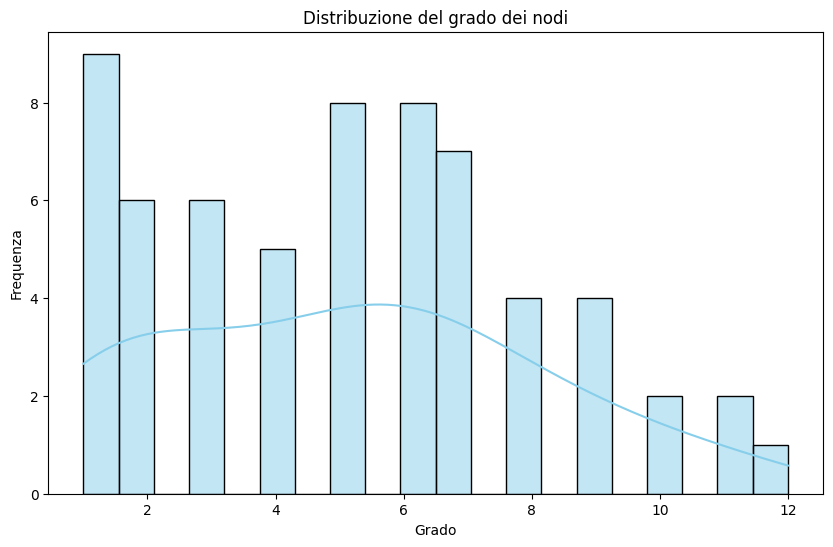

In [ ]:
degrees = [degree for node, degree in G.degree()]
plt.figure(figsize=(10, 6))
sns.histplot(degrees, bins=20, kde=True, color='skyblue')
plt.title('Distribuzione del grado dei nodi')
plt.xlabel('Grado')
plt.ylabel('Frequenza')
plt.show()


In [ ]:
diameter = nx.diameter(G)
print(f"Diametro della rete: {diameter}")

Diametro della rete: 8


Coefficiente di clustering medio: 0.2589582460550202


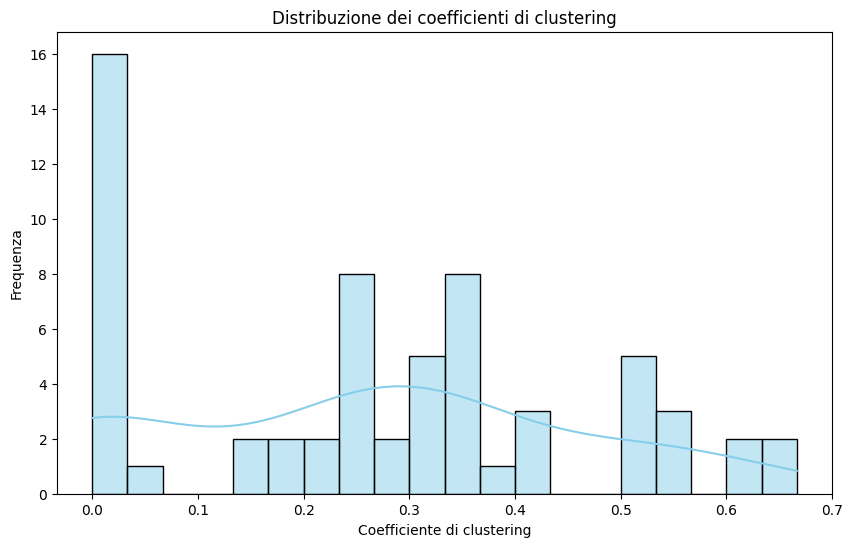

In [ ]:
clustering_coeffs = nx.clustering(G)
average_clustering = nx.average_clustering(G)
print(f"Coefficiente di clustering medio: {average_clustering}")

plt.figure(figsize=(10, 6))
sns.histplot(list(clustering_coeffs.values()), bins=20, kde=True, color='skyblue')
plt.title('Distribuzione dei coefficienti di clustering')
plt.xlabel('Coefficiente di clustering')
plt.ylabel('Frequenza')
plt.show()

In [ ]:
# Top 5 nodi per centralità di grado
top_degree = sorted(degree_dict.items(), key=lambda item: item[1], reverse=True)[:5]
print("Top 5 nodi per centralità di grado:", top_degree)

# Top 5 nodi per centralità di betweenness
top_betweenness = sorted(betweenness_dict.items(), key=lambda item: item[1], reverse=True)[:5]
print("Top 5 nodi per centralità di betweenness:", top_betweenness)

# Top 5 nodi per centralità di closeness
top_closeness = sorted(closeness_dict.items(), key=lambda item: item[1], reverse=True)[:5]
print("Top 5 nodi per centralità di closeness:", top_closeness)

# Top 5 nodi per centralità di eigenvector
top_eigenvector = sorted(eigenvector_dict.items(), key=lambda item: item[1], reverse=True)[:5]
print("Top 5 nodi per centralità di eigenvector:", top_eigenvector)


Top 5 nodi per centralità di grado: [('Grin', 12), ('SN4', 11), ('Topless', 11), ('Scabs', 10), ('Trigger', 10)]
Top 5 nodi per centralità di betweenness: [('SN100', 0.24823719602893804), ('Beescratch', 0.21332443553281097), ('SN9', 0.1431495183426175), ('SN4', 0.13856978865859435), ('DN63', 0.11823861926938342)]
Top 5 nodi per centralità di closeness: [('SN100', 0.4178082191780822), ('SN9', 0.40397350993377484), ('SN4', 0.39869281045751637), ('Kringel', 0.391025641025641), ('Grin', 0.3765432098765432)]
Top 5 nodi per centralità di eigenvector: [('Grin', 0.3157810764804676), ('SN4', 0.3005609284704956), ('Topless', 0.28500310473240437), ('Scabs', 0.281097017160587), ('TR99', 0.21769051331081507)]


In [ ]:
# Rimuovere nodi e verificare l'effetto sul diametro

original_diameter = nx.diameter(G)

# Copiare il grafo per evitare modifiche permanenti
G_copy = G.copy()
nodes_to_remove = random.sample(list(G_copy.nodes()), k=5)

G_copy.remove_nodes_from(nodes_to_remove)

try:
    new_diameter = nx.diameter(G_copy)
    print(f"Diametro originale: {original_diameter}, nuovo diametro dopo rimozione dei nodi: {new_diameter}")
except nx.NetworkXError:
    print("La rete è diventata sconnessa dopo la rimozione dei nodi.")


Diametro originale: 8, nuovo diametro dopo rimozione dei nodi: 8


In [ ]:
# Creare layout 3D per la rete
pos_3d = nx.spring_layout(G, dim=3)

# Traccia degli archi
edge_trace = []
for edge in G.edges():
    x0, y0, z0 = pos_3d[edge[0]]
    x1, y1, z1 = pos_3d[edge[1]]
    edge_trace.append(go.Scatter3d(
        x=[x0, x1, None],
        y=[y0, y1, None],
        z=[z0, z1, None],
        mode='lines',
        line=dict(color='gray', width=1)
    ))

# Traccia dei nodi
node_trace = go.Scatter3d(
    x=[pos_3d[node][0] for node in G.nodes()],
    y=[pos_3d[node][1] for node in G.nodes()],
    z=[pos_3d[node][2] for node in G.nodes()],
    mode='markers+text',
    text=[node for node in G.nodes()],  # Usare l'ID del nodo come etichetta
    marker=dict(size=5, color='skyblue')
)

fig = go.Figure(data=edge_trace + [node_trace])
fig.update_layout(title="Rete dei delfini in 3D",
                  scene=dict(xaxis=dict(showbackground=False),
                             yaxis=dict(showbackground=False),
                             zaxis=dict(showbackground=False)))
fig.show()




ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed